<a href="https://colab.research.google.com/github/sdizdarevic/OpenVinotest/blob/main/Openvinotest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "ultralytics==8.0.43"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.6/299.6 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 28.5 MB/s eta 0:00:00


In [ ]:

!apt-get install intel-opencl-icd


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libigc1 libigdfcl1 libigdgmm11 libllvmspirvlib10 libopencl-clang10
The following NEW packages will be installed:
  intel-opencl-icd libigc1 libigdfcl1 libigdgmm11 libllvmspirvlib10
  libopencl-clang10
0 upgraded, 6 newly installed, 0 to remove and 13 not upgraded.
Need to get 8,112 kB of archives.
After this operation, 42.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libigdgmm11 amd64 20.1.1+ds1-1 [111 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libigc1 amd64 1.0.3627-2 [6,285 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libllvmspirvlib10 amd64 10.0.0-1 [596 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libopencl-clang10 amd64 10.0.0-2 [84.3 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/universe amd64 libigdfcl1 amd64 1.0

In [ ]:
from typing import Tuple, Dict
import cv2
import numpy as np
from PIL import Image
from ultralytics.yolo.utils.plotting import colors


def plot_one_box(box:np.ndarray, img:np.ndarray, color:Tuple[int, int, int] = None, mask:np.ndarray = None, label:str = None, line_thickness:int = 5):
    """
    Helper function for drawing single bounding box on image
    Parameters:
        x (np.ndarray): bounding box coordinates in format [x1, y1, x2, y2]
        img (no.ndarray): input image
        color (Tuple[int, int, int], *optional*, None): color in BGR format for drawing box, if not specified will be selected randomly
        mask (np.ndarray, *optional*, None): instance segmentation mask polygon in format [N, 2], where N - number of points in contour, if not provided, only box will be drawn
        label (str, *optonal*, None): box label string, if not provided will not be provided as drowing result
        line_thickness (int, *optional*, 5): thickness for box drawing lines
    """
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
    if mask is not None:
        image_with_mask = img.copy()
        mask
        cv2.fillPoly(image_with_mask, pts=[mask.astype(int)], color=color)
        img = cv2.addWeighted(img, 0.5, image_with_mask, 0.5, 1)
    return img


def draw_results(results:Dict, source_image:np.ndarray, label_map:Dict):
    """
    Helper function for drawing bounding boxes on image
    Parameters:
        image_res (np.ndarray): detection predictions in format [x1, y1, x2, y2, score, label_id]
        source_image (np.ndarray): input image for drawing
        label_map; (Dict[int, str]): label_id to class name mapping
    Returns:

    """
    boxes = results["det"]
    masks = results.get("segment")
    h, w = source_image.shape[:2]
    for idx, (*xyxy, conf, lbl) in enumerate(boxes):
        label = f'{label_map[int(lbl)]} {conf:.2f}'
        mask = masks[idx] if masks is not None else None
        source_image = plot_one_box(xyxy, source_image, mask=mask, label=label, color=colors(int(lbl)), line_thickness=1)
    return source_image


In [ ]:
IMAGE_PATH = "/content/f_dog.jpg"


Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/f_dog.jpg: 480x640 4 persons, 10 bicycles, 1 dog, 62.9ms
Speed: 0.7ms preprocess, 62.9ms inference, 36.3ms postprocess per image at shape (1, 3, 640, 640)


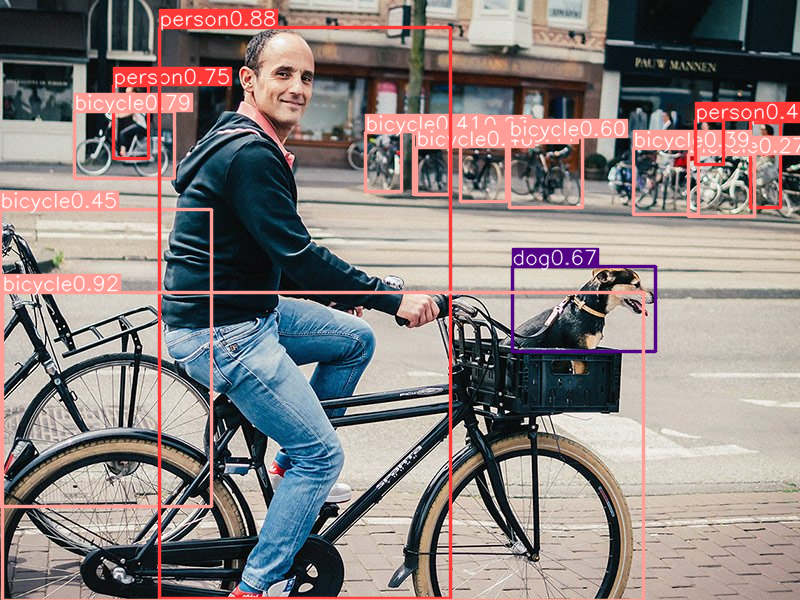

In [ ]:
from ultralytics import YOLO

DET_MODEL_NAME = "yolov8n"

det_model = YOLO(f'{DET_MODEL_NAME}.pt')
label_map = det_model.model.names

res = det_model(IMAGE_PATH)
Image.fromarray(res[0].plot()[:, :, ::-1])
